# Scraping `zangia.mn`
* You need to import `pandas`, `requests` and `BeautifulSoup`

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

### Exercise 1: Scrape `zangia.mn` page#1
* Make a dataframe using `Мэдээлэл технологи, Харилцаа холбоо` category `https://www.zangia.mn/job/list/pg.1/b.4`.
* Get job listings from page 1.
  * DataFrame should include columns: `job_title`, `salary`. 
  * Remove the row if `salary` text contains `Тохиролцоно`. 
    * *Hint*: Loop over the df and use `in` and `drop` methods.
  * Take salary as 5000000 if `salary` text contains `5,000,000 -ааc дээш`
  * Import statistics library
  * Get the median salary using statistics library if there is a salary range. Example: 2,500,000-3,500,000 should be 3000000. 
    * Use string replace method to remove comma from numbers.
    * *Hint*: Use string split method to get the numbers. 
  * Make a histogram plot using the `salary`.  


In [3]:
# Your code
response = requests.get("https://www.zangia.mn/job/list/pg.1/b.4")

In [4]:
soup = BeautifulSoup(response.content)

In [5]:
ads = soup.find_all("div", {"class":"ad"})

In [6]:
ads[0].find('b').get_text()

'Хөгжүүлэгч'

In [7]:
job_titles = []
for ad in ads:
    job_title = ad.find('b').get_text()
    job_titles.append(job_title)

In [8]:
job_titles

['Хөгжүүлэгч',
 'САНХҮҮГИЙН БАЙЦААГЧ',
 'Скрам мастер /Төслийн менежер/',
 'Өгөгдлийн сангийн хөгжүүлэгч',
 'IT ИНЖЕНЕР/УУРХАЙД/',
 'Чанарын баталгаажуулалтын мененежер',
 'Захиалгын утасны оператор ажилд авна.',
 'Ахлах мэргэжилтэн  /Мэдээллийн аюулгүй байдал/',
 'Мэдээллийн аюулгүй байдал хариуцсан менежер',
 'IT ТӨСӨЛ ХАРИУЦСАН АХЛАХ МЕНЕЖЕР',
 'ОНЛАЙН БОРЛУУЛАЛТЫН МЕНЕЖЕР',
 'Сүлжээний инженер',
 'Банк бусын оператор',
 'Call center operator',
 'Оператор (эмэгтэй)',
 'Аюулгүй байдлын инженер',
 'Хөгжүүлэгч / FrontEnd/',
 'Хэрэглэгчийн зөвлөх (Хэнтий аймагт)',
 'AI хиймэл оюун ухаан судлаач',
 'Ээлжийн инженер',
 'СИСТЕМИЙН МЭРГЭЖИЛТЭН',
 'Лавлах утасны оператор /Ээлжийн/',
 'Програм хангамж хөгжүүлэгч /Дунд түвшин/',
 'Техникч /хотод ажиллах/',
 'ХОЛБОО ДОХИОЛЛЫН ИНЖЕНЕР',
 'Сүлжээний инженер',
 'Сүлжээний инженер',
 'Програмист',
 'Мэдээлэл технологийн инженер',
 'Програм хангамж хөгжүүлэгч /Ахисан түвшин/',
 'Back-end developer',
 'Харилцагчийн үйлчилгээний ажилтан',
 'Ахлах Back

In [9]:
ads[0].find('span', {"class":"fsal"}).get_text()

'3,000,000 - 4,000,000'

In [10]:
job_salaries = []
for ad in ads:
    job_salary = ad.find('span', {"class": "fsal"}).get_text()
    job_salaries.append(job_salary)

In [15]:
df = pd.DataFrame({"job_titles": job_titles, "job_salary": job_salaries})

In [16]:
df.head()

,job_titles,job_salary
0,Хөгжүүлэгч,"3,000,000 - 4,000,000"
1,САНХҮҮГИЙН БАЙЦААГЧ,"1,200,000 - 1,500,000 Тохиролцоно"
2,Скрам мастер /Төслийн менежер/,"2,100,000 - 2,500,000"
3,Өгөгдлийн сангийн хөгжүүлэгч,"3,000,000 - 4,000,000"
4,IT ИНЖЕНЕР/УУРХАЙД/,"2,100,000 - 2,500,000"


In [17]:
import statistics

In [19]:
for i in range(len(df)):
    if "Тохиролцоно" in df['job_salary'][i]:
        df.drop(i, inplace=True)
        
    if "5,000,000 -ааc дээш" in df['job_salary'][i]:
        df['job_salary'] = 5_000_000
        

KeyError: 1

In [20]:
df = df.reset_index(drop=True)

In [21]:
int(df['job_salary'][0].split('-')[0].replace(',',''))

3000000

In [116]:
for i in range(len(df)):
    lower_sal = int(df['job_salary'][i].split('-')[0].replace(',',''))
    upper_sal = int(df['job_salary'][i].split('-')[1].replace(',',''))
    
    median_sal = statistics.median((lower_sal, upper_sal))
    
    df['job_salary'][i] = median_sal
    

In [117]:
df

,job_titles,job_salary
0,ТӨЛӨВЛӨЛТИЙН ИНЖЕНЕР,2750000.0
1,Худалдааны зөвлөх,1650000.0
2,ЦАГИЙН АЖИЛ /ТЭСО ИНВЕСТМЭНТ ХХК/,550000.0
3,МЭДЭЭЛЭЛ ТЕХНОЛОГИЙН АЖИЛТАН,1650000.0
4,IT System Analyst,2750000.0
5,Холбоо дохиололийн инженер,1650000.0
6,Мэдээллийн аюулгүй байдлын шинжээч,3500000.0
7,Төслийн менежер,1650000.0
8,Төслийн менежер,1650000.0
9,ГРАФИК ДИЗАЙНЕР АЖИЛД АВНА.,2750000.0


<AxesSubplot:ylabel='Frequency'>

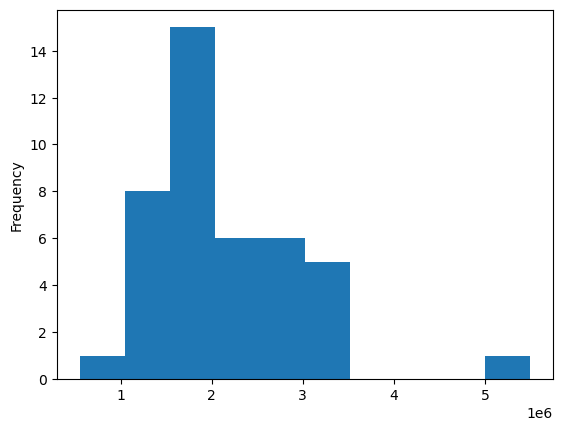

In [119]:
df['job_salary'].plot.hist()

### Exercise 2: Scrape `zangia.mn` Page#1 - Page#10
* Make a dataframe using `Мэдээлэл технологи, Харилцаа холбоо` category `https://www.zangia.mn/job/list/pg.1/b.4`.
* Get job listings from page 1-10. *Hint* Loop over the list of pages
* Make a dataframe and make a histogram plot using `salary` column.

In [ ]:
# Your code

### Exercise 3: Scrape `zangia.mn` Page#1 - Page#7
* Make a dataframe using `Захиргаа, Хүний нөөц` category `https://www.zangia.mn/job/list/pg.1/b.36`.
* Get job listings from page 1-7.
* Make a dataframe and make a histogram plot using `salary` column.

**WARNING** MAKE SURE YOUR LINKS ARE CORRECT!

In [ ]:
# Your code